**Import libraries**

In [19]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib import style
import squarify as sq

### **Scrapping currencies**

**Declaring currencies URL**

In [20]:
bitcoin = 'https://coinmarketcap.com/currencies/bitcoin/'
jupiter = 'https://coinmarketcap.com/currencies/jupiter-ag/'
tars = 'https://coinmarketcap.com/currencies/tars-protocol/'
solana = 'https://coinmarketcap.com/currencies/solana/'
ethereum = 'https://coinmarketcap.com/currencies/ethereum/'
xrp = 'https://coinmarketcap.com/currencies/xrp/'
kaspa = 'https://coinmarketcap.com/currencies/kaspa/'
notcoin = 'https://coinmarketcap.com/currencies/notcoin/'

# storage the links in a list

data = {
    "Bitcoin": bitcoin,
    "Jupiter": jupiter,
    "Tars Protocol": tars,
    "Solana": solana,
    "Ethereum": ethereum,
    "XRP": xrp,
    "Kaspa": kaspa,
    "Notcoin": notcoin
}

# convert the dictionary to a pandas DataFrame

links = pd.DataFrame(data.items(), columns=["Currency", "Link"])
links

,Currency,Link
0,Bitcoin,https://coinmarketcap.com/currencies/bitcoin/
1,Jupiter,https://coinmarketcap.com/currencies/jupiter-ag/
2,Tars Protocol,https://coinmarketcap.com/currencies/tars-prot...
3,Solana,https://coinmarketcap.com/currencies/solana/
4,Ethereum,https://coinmarketcap.com/currencies/ethereum/
5,XRP,https://coinmarketcap.com/currencies/xrp/
6,Kaspa,https://coinmarketcap.com/currencies/kaspa/
7,Notcoin,https://coinmarketcap.com/currencies/notcoin/


**Creating price dataframe**

In [21]:
price_df = pd.DataFrame(columns = ['Currency', 'Price', 'Market cap', 'Date'])
price_df

,Currency,Price,Market cap,Date


**Setting up execution time frames**

In [22]:
print('''Set execution time or use default lapses (1 hour)?:
      1. Set
      Anything else. Use default
      ''')
choose = input()

if choose == '1':
    # setting execution time
    print('Set time of execution:')
    print ('Set minutes')
    minutes = input()
    minutes = int(minutes)
    print ('Set seconds')
    seconds = input()
    seconds = int(seconds)
    timeout = time.time() + minutes + seconds
    print(f'Execution time = {minutes}:{seconds}')
    timeout = time.time() + ((minutes*60) + seconds)

    # setting intervals
    print('Set time interval between scrapping loops:')
    print ('Set minutes')
    iminutes = input()
    iminutes = int(iminutes)
    print ('Set seconds')
    iseconds = input()
    iseconds = int(iseconds)
    print(f'interval time = {iminutes}:{iseconds}')
    interval = (iminutes*60) + iseconds
else:
    timeout = time.time() + 60*60
    interval = 150

Set execution time or use default lapses (1 hour)?:
      1. Set
      Anything else. Use default
      
Set time of execution:
Set minutes
Set seconds
Execution time = 60:0
Set time interval between scrapping loops:
Set minutes
Set seconds
interval time = 2:30


**Creating loop**

In [23]:
while True:
    c = 0
    
    # for loop to iterate links and scrapp values
    for index, row in links.iterrows():

        # request page
        response = requests.get(row['Link'])
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # find price
        price = soup.find('span', class_='sc-65e7f566-0 clvjgF base-text')
        # find market cap
        marketcap = soup.find('dd', class_='sc-65e7f566-0 dzgtSD base-text').text
        
        # marketcap cleaning
        dollar_index = marketcap.find('$')
        if dollar_index != -1:
            marketcap = marketcap[dollar_index:]

        # setting transition dataframe
        record = pd.DataFrame({
        'Currency': row['Currency'],
        'Price': price,
        'Market cap': marketcap,
        'Date': datetime.today().strftime('%Y-%m-%d %H:%M')
        }, index=[0])

        #print(name)
        print(record)

        # record append on price_df
        price_df = pd.concat([price_df, record], ignore_index=True)
    
    # timeframe repeat
    time.sleep(interval)

    # close loop
    if c == 5 or time.time() > timeout:
        break
    

  Currency       Price          Market cap              Date
0  Bitcoin  $64,336.92  $1,271,046,002,763  2024-08-24 15:45
  Currency    Price      Market cap              Date
0  Jupiter  $0.9371  $1,265,055,647  2024-08-24 15:45
        Currency    Price   Market cap              Date
0  Tars Protocol  $0.1351  $16,757,189  2024-08-24 15:45
  Currency    Price       Market cap              Date
0   Solana  $161.56  $75,292,912,707  2024-08-24 15:45
   Currency      Price        Market cap              Date
0  Ethereum  $2,798.03  $336,714,794,222  2024-08-24 15:45
  Currency   Price       Market cap              Date
0      XRP  $0.621  $34,888,106,170  2024-08-24 15:45
  Currency    Price      Market cap              Date
0    Kaspa  $0.1772  $4,345,382,988  2024-08-24 15:45
  Currency     Price      Market cap              Date
0  Notcoin  $0.01201  $1,231,189,799  2024-08-24 15:45
  Currency       Price          Market cap              Date
0  Bitcoin  $64,342.76  $1,270,307,631,65

In [26]:
price_df

,Currency,Price,Market cap,Date
0,Bitcoin,"$64,336.92","$1,271,046,002,763",2024-08-24 15:45
1,Jupiter,$0.9371,"$1,265,055,647",2024-08-24 15:45
2,Tars Protocol,$0.1351,"$16,757,189",2024-08-24 15:45
3,Solana,$161.56,"$75,292,912,707",2024-08-24 15:45
4,Ethereum,"$2,798.03","$336,714,794,222",2024-08-24 15:45
...,...,...,...,...
187,Solana,$160.90,"$74,985,552,036",2024-08-24 16:44
188,Ethereum,"$2,801.76","$337,247,469,113",2024-08-24 16:44
189,XRP,$0.6229,"$34,993,434,137",2024-08-24 16:44
190,Kaspa,$0.1778,"$4,359,945,587",2024-08-24 16:44


### **Charting results**

**Cleaning dataset**

In [27]:

# setting Hour format
price_df['Date'] = pd.to_datetime(price_df['Date'])

# create a Market cap label
price_df["Label"] = price_df["Currency"] + " (" + price_df["Market cap"].astype("str")+")"

# convert Price to float
price_df['Price'] = price_df['Price'].str.replace('$', '', regex=False)
price_df['Price'] = price_df['Price'].str.replace(',', '', regex=False)
price_df['Price'] = price_df['Price'].apply(float)

# convert Market cap
price_df['Market cap'] = price_df['Market cap'].str.replace('$', '', regex=False)
price_df['Market cap'] = price_df['Market cap'].str.replace(',', '', regex=False)
price_df['Market cap'] = price_df['Market cap'].apply(float)

price_df

,Currency,Price,Market cap,Date,Label
0,Bitcoin,64336.92000,1.271046e+12,2024-08-24 15:45:00,"Bitcoin ($1,271,046,002,763)"
1,Jupiter,0.93710,1.265056e+09,2024-08-24 15:45:00,"Jupiter ($1,265,055,647)"
2,Tars Protocol,0.13510,1.675719e+07,2024-08-24 15:45:00,"Tars Protocol ($16,757,189)"
3,Solana,161.56000,7.529291e+10,2024-08-24 15:45:00,"Solana ($75,292,912,707)"
4,Ethereum,2798.03000,3.367148e+11,2024-08-24 15:45:00,"Ethereum ($336,714,794,222)"
...,...,...,...,...,...
187,Solana,160.90000,7.498555e+10,2024-08-24 16:44:00,"Solana ($74,985,552,036)"
188,Ethereum,2801.76000,3.372475e+11,2024-08-24 16:44:00,"Ethereum ($337,247,469,113)"
189,XRP,0.62290,3.499343e+10,2024-08-24 16:44:00,"XRP ($34,993,434,137)"
190,Kaspa,0.17780,4.359946e+09,2024-08-24 16:44:00,"Kaspa ($4,359,945,587)"


**Price evolution (Bitcoin)**

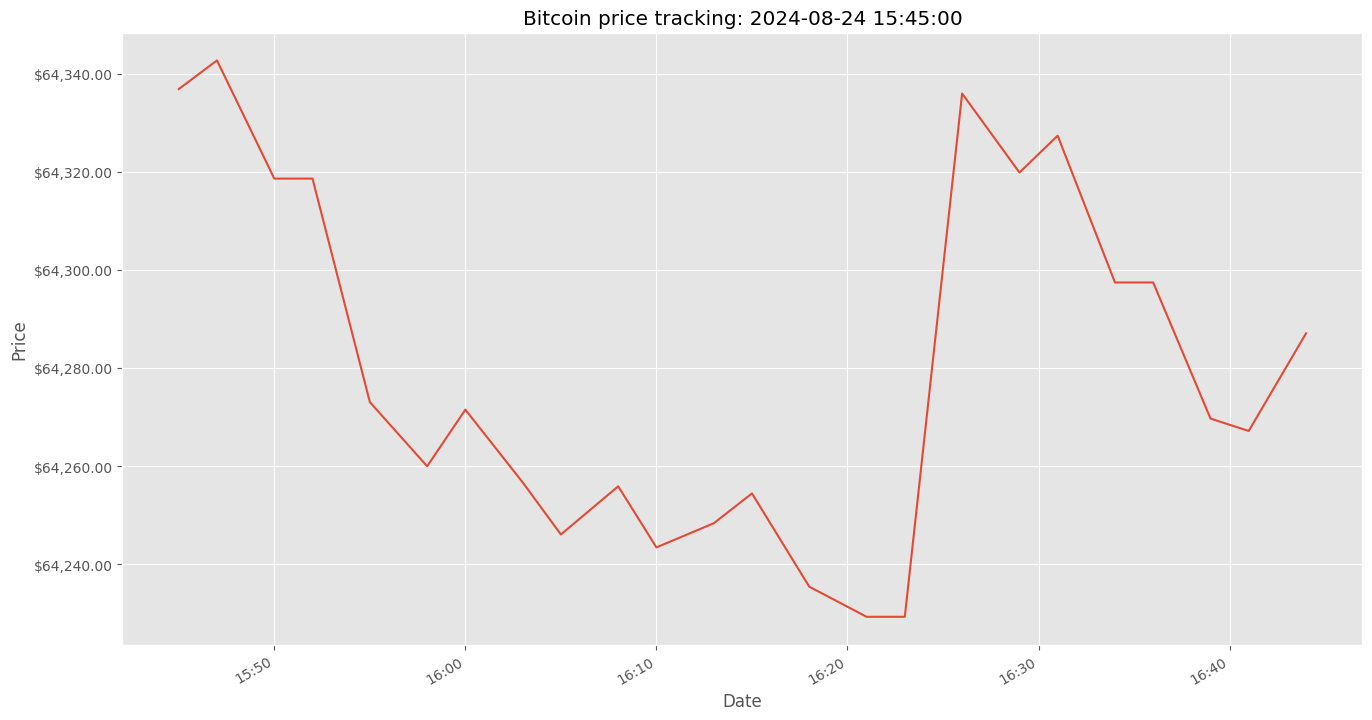

<Figure size 1200x600 with 0 Axes>

In [28]:
# filter dataframe
price_bitcoin = price_df[price_df['Currency'] == 'Bitcoin']

sns.lineplot(data=price_bitcoin, x="Date", y="Price")
# setting title
plt.title(f"Bitcoin price tracking: {price_df['Date'][0]}")
# fixing axis
plt.gcf().autofmt_xdate()
# fixing x legend
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# fixing y legend
def dollar_formatter(x, pos):
    return f'${x:,.2f}'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(dollar_formatter))
plt.figure(figsize=(12, 6))
plt.show()

**Price change % tracking**

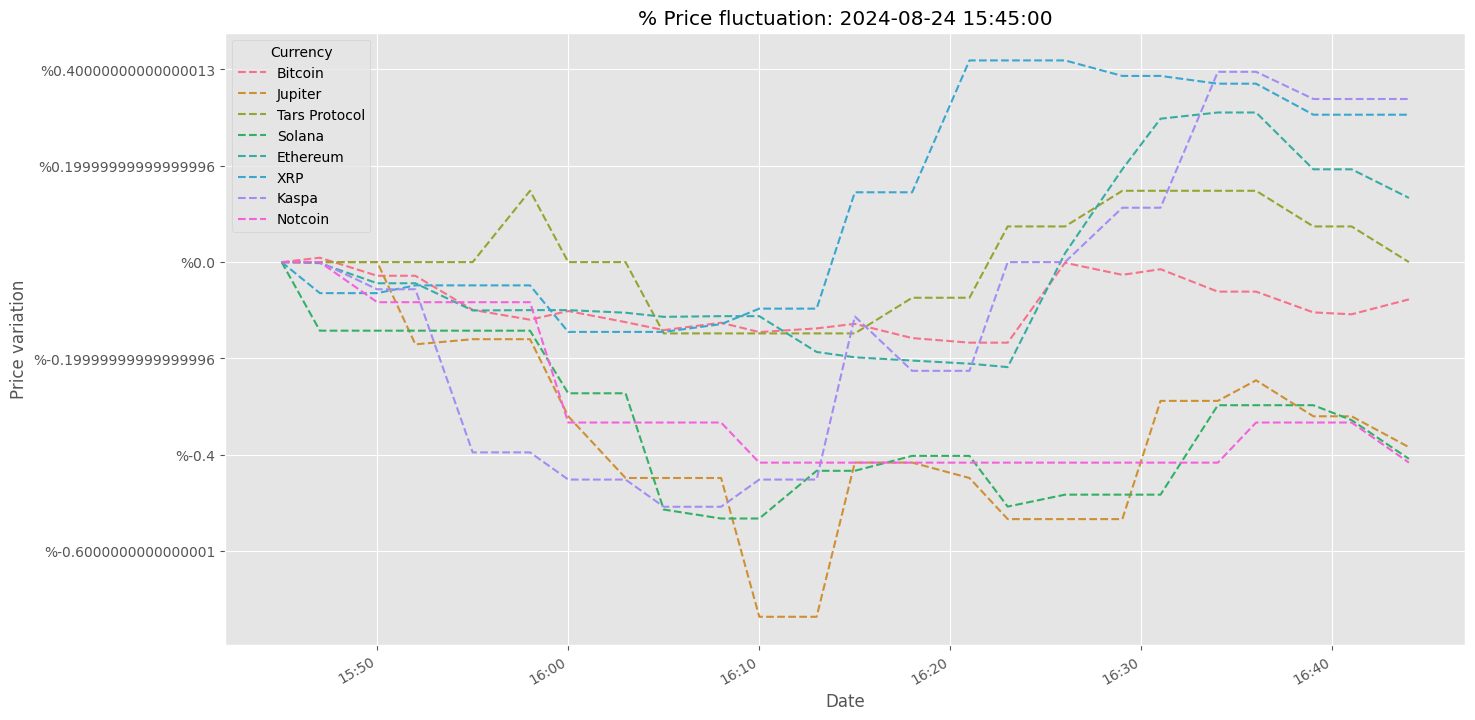

<Figure size 1200x600 with 0 Axes>

In [29]:
def calculate_percent_fluctuation(price_df):
    # Group by currency
    grouped_df = price_df.groupby('Currency')

    # Calculate initial price for each group
    initial_prices = grouped_df['Price'].transform('first')

    # Calculate percentage fluctuation
    price_df['Price variation'] = ((price_df['Price'] - initial_prices) / initial_prices) * 100

    return price_df

price_df = calculate_percent_fluctuation(price_df)

# charting line
sns.lineplot(data=price_df, x="Date", y="Price variation", hue='Currency', linestyle='--')
# setting title
plt.title(f"% Price fluctuation: {price_df['Date'][0]}")
# fixing axis
plt.gcf().autofmt_xdate()
# fixing x legend
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# fixing y legend
def per_formatter(x, pos):
    return f'%{x}'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(per_formatter))
plt.figure(figsize=(12, 6))
plt.show()

### **Market cap tree**

**Setting market cap final values**

In [30]:
# finding and sorting last values
mcap_last = price_df.groupby('Currency').last()
mcap_last.sort_values(by="Market cap", ascending=False).head(5)
# top 5 currencies by Market cap
mcap_last = mcap_last.nlargest(5, 'Market cap')
mcap_last

,Price,Market cap,Date,Label,Price variation
Currency,,,,,
Bitcoin,64287.1100,1.269477e+12,2024-08-24 16:44:00,"Bitcoin ($1,269,477,300,788)",-0.077421
Ethereum,2801.7600,3.372475e+11,2024-08-24 16:44:00,"Ethereum ($337,247,469,113)",0.133308
Solana,160.9000,7.498555e+10,2024-08-24 16:44:00,"Solana ($74,985,552,036)",-0.408517
XRP,0.6229,3.499343e+10,2024-08-24 16:44:00,"XRP ($34,993,434,137)",0.305958
Kaspa,0.1778,4.359946e+09,2024-08-24 16:44:00,"Kaspa ($4,359,945,587)",0.338600


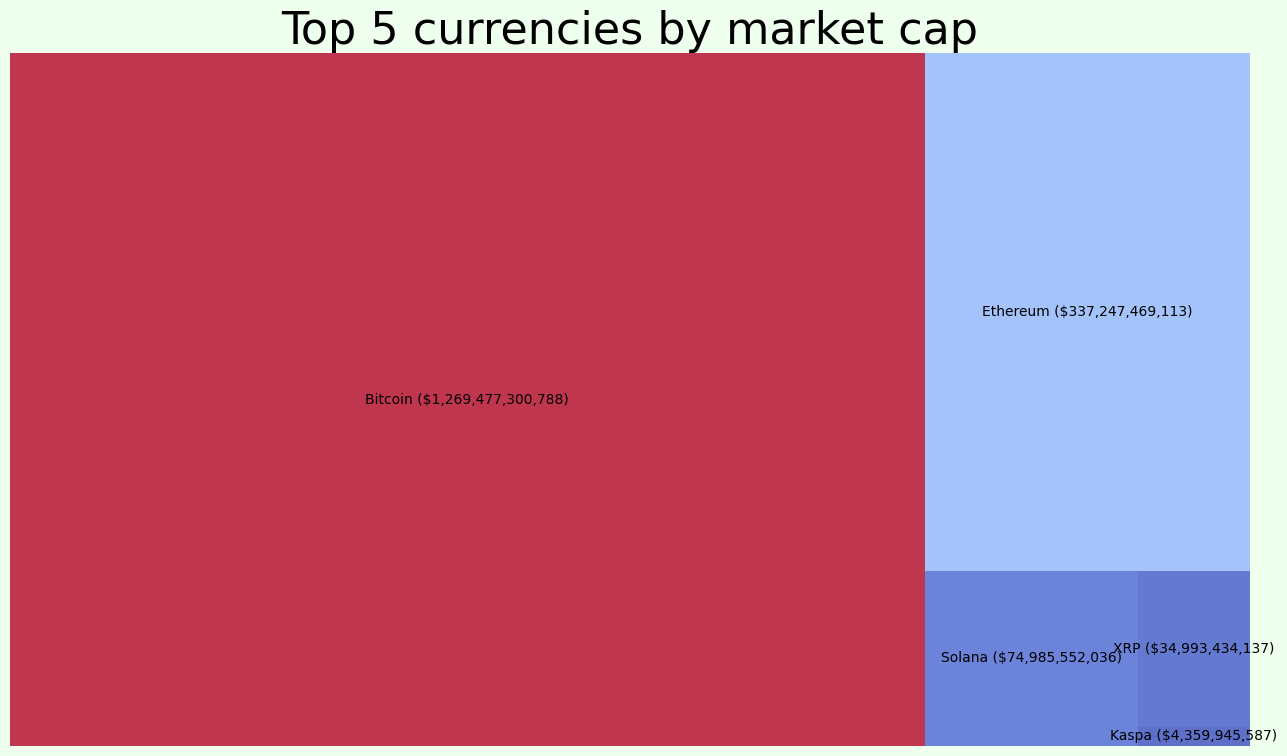

In [31]:

# set large Plot
plt.rcParams['figure.figsize'] = (16.0, 9.0)
# use ggplot style
style.use('ggplot')



# get axis and figure
fig, ax = plt.subplots()
# set colormap
cmap = plt.cm.coolwarm
# min and max Values
mini = min(mcap_last["Market cap"])
maxi = max(mcap_last["Market cap"])
# finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in mcap_last["Market cap"]]
# plotting
sq.plot(sizes=mcap_last["Market cap"], label=mcap_last["Label"], alpha=0.8, color=colors)
plt.tick_params(labelsize=10)
# removing axis
plt.axis('off')
# invert Y-Axis
plt.gca().invert_yaxis()
# title
plt.title("Top 5 currencies by market cap", fontsize=32)
# title Positioning
ttl = ax.title
ttl.set_position([.5, 1.05])
# BG color
fig.set_facecolor('#eeffee')